<h2 align='center'>🧠 Intro to Deep Learning 3 - Exploring More Activation Functions and Layers</h2>
<br />
<i><center>Let's add more options to our Activation Functions and Layers Menu!</center></i>

----

👋 What's shaking, guys? In this notebook we will see other examples of `Activation Functions` and `Layers` in Keras. Here is the lesson's summary for today:

<br />

> Activation Functions:

```
- Sigmoid (Logistic);
- Hyperbolic Tangent (Tanh);
- Rectified Linear Unit (ReLU);
- Leaky ReLU;
- Parametric Leaky ReLU (PReLU);
- Exponential Linear Units (ELU);
- Scaled Exponential Linear Unit (SELU).
```

<br />

> Layers:

```
- Dense Layer;
- Dropout Layer;
- Batch Normalization Layer (batchnorm);
- Flattened Layer;
- Reshape Layer;
- Permute Layer;
- RepeatVector Layer;
- Lambda Layer;
- Pooling Layer;
- Locally Connected Layer.
```

<br />

Let's go!

----

In [1]:
# pip install tensorflow
from tensorflow import keras
from tensorflow.keras import layers

----

<h2>0) Activation Functions</h2>

Before going to the Activation Functions, let's explain some essential things for your better understanding:

> **Activation Functions** - functions to adjust the weights and bias of a network;

> **Activation Functions Derivatives** - plot of the possible slopes in the weights and bias adjustments. Can be big or small ones;

> **Convergence Rate** - synonym of Learning Rate;

> **Gradient** - the slope used by the Optimizers, such as Adam, to adjust the weights and bias.

----

<b>- Sigmoid (*Logistic*)</b>

As seen in the previous notebook, the `Sigmoid (Logistic)` Activation Function is used for Classification Problems transforming the outputs in a scale from 0 to 1. The equation is given as below (consider `e` as `Euler's Constant` that is approximely equals to `2.71`, and `x` as the input):

```python
sigmoid(x) = 1 / (1 + e**-x)
```

$$\text{sigmoid}(x) = \frac{1}{{1 + e^{-x}}}$$

<br />

The plot of the function and its derivative:

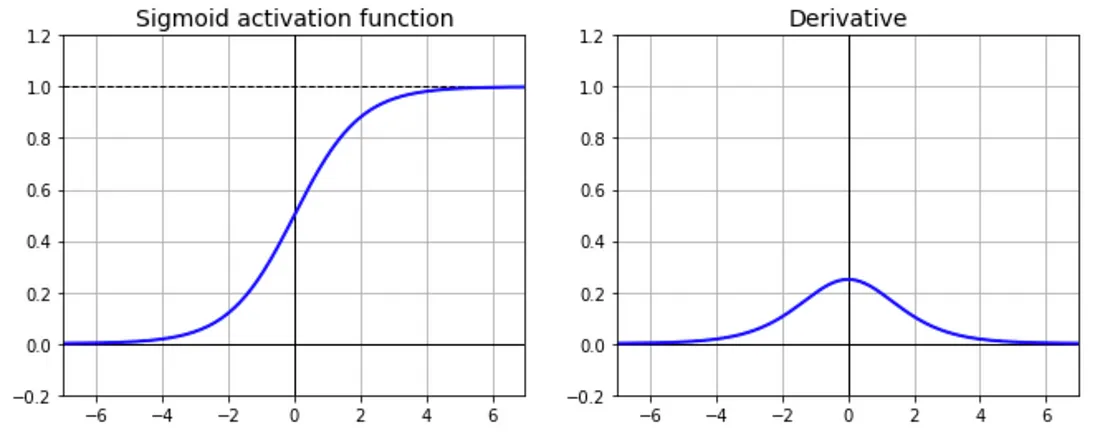

<br />

Some problems in using this Activation Function:

> **Vanishing Gradient** - looking at the function plot, you can see that when inputs become small or large, the function saturates at 0 or 1, with a derivative extremely close to 0 and the weights and bias have the probability to not be adjusted anymore. Thus it has almost no gradient to propagate back through the network, so there is almost nothing left for lower layers;

> **Computationally Expensive** - the function has an exponential operation, so as larger the datasets, the longer will be the training step;

> **The Output is not Zero Centered** - in the derivative plot, when the input's equal 0, the result is **0.5 centered**.

<br />

Code:

In [2]:
# ---- Sigmoid Function Declaration ----
model = keras.Sequential([
    layers.Dense(units=512, activation='sigmoid', input_shape=[11])
])

----

<b>- Hyperbolic Tangent (*Tanh*)</b>

`Hyperbolic Tangent`, AKA `Tanh`, is applied in Classification Problems transforming the outputs in a scale from -1 to 1 and being a good Sigmoid Function alternative in some cases. Its equation is given as below:

```python
tanh(x) = (e**x - e**-x) / (e**x + e**-x)
```

$$\text{tanh}(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$$

<br />

The plot of the function and its derivative:

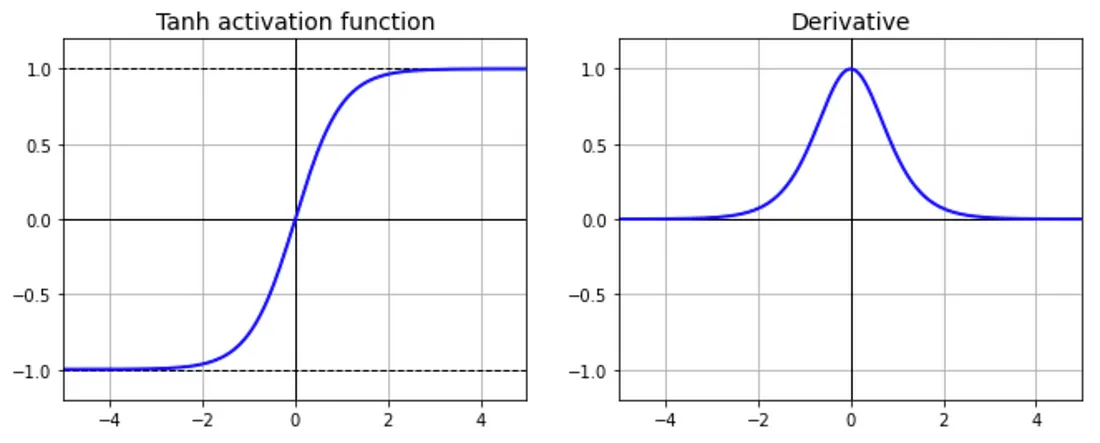

<br />

Some problems in using this Activation Function - since it is similar to Sigmoid one, the problems are the sames, except the fact that the output is **zero centered**:

> **Vanishing Gradient** - looking at the function plot, you can see that when inputs become small or large, the function saturates at -1 or 1, with a derivative extremely close to 0 and the weights and bias have the probability to not be adjusted anymore. Thus it has almost no gradient to propagate back through the network, so there is almost nothing left for lower layers;

> **Computationally Expensive** - the function has an exponential operation, so as larger the dataset, the longer will be the training step.

<br />

Code:

In [3]:
model = keras.Sequential([
    layers.Dense(units=512, activation='tanh', input_shape=[11])
])

**OBS.:** about choosing between Sigmoid and Tanh Functions, we observe that the gradient of Tanh is four times greater than Sigmoid's. This means that using that one results in higher values of gradient during traning and higher updates in the weights and bias of our model. So, if you want **strong gradients** and **big learning steps**, you should use the Tanh Activation function; else, Sigmoid would be the perfect match!

----

<b>- Rectified Linear Unit (*ReLU*)</b>

You've already seen this function, right? `ReLU` is the mos popular Activation Function and it works like this: when the input is negative, it returns 0, and when the input is positive, it returns the input value, that's it, simple! Equation:

```python
relu(x) = 0 if x <= 0 else x
```

$$
relu(x) = \begin{cases}
0 & \text{if } x \leq 0 \\
x & \text{if } x > 0
\end{cases}
$$

<br />

The plot of the function and its derivative:

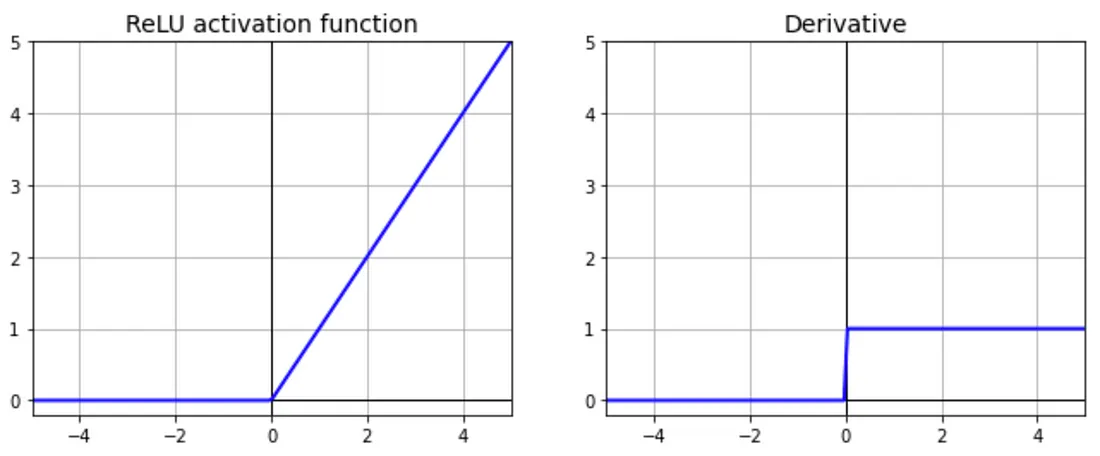

<br />

Some problems in using this Activation Function - yeah, even working great in most applications, it's not perfect as we think 😥):

> **Dying ReLU** - during training, some neurons effectively **die**, meaning they stop outputting anything other than 0. In some cases, you may find that half of your network's neurons are dead, especially if you used a **large Learning Rate**. A neuron dies when its weights and bias get tweaked in such a way that the weighted sum of its inputs are negative for all instances in the training set. When this happens, it just keeps outputing 0s, and Gradiend Descent does not affect it anymore since the gradient of the ReLU function is 0 when its input is negative (*Hands-on Machine Learning [2], page 329*).

<br />

Code:

In [4]:
model = keras.Sequential([
    layers.Dense(units=512, activation='relu', input_shape=[11])
])

----

<b>- Leaky ReLU</b>

Now there's something quite interesting to us, when the Data Scientists stumbled upon Dying ReLU they wonder: "*By any change, is there any way to avoid it forever?* and they came up with an *yes!!* to the question. Yeah, this is the short story of how `Leaky ReLU` has been created. It works like ReLU, but with the difference that **never** will happen Dying ReLU with it. Equation:

```python
leaky_relu(x) = max(alpha*x, x)
```

$$
\text{leaky_relu}(x) = \max(\alpha \cdot x, x)
$$

Where *α (alpha)* is the hyperparameter of how much the function leaks, that is, it's the slope of the function for `x <= 0` and is typically set to `0.01`. Also, the small slope ensures that this Activation Function never dies.

<br />

Plot of the function and its derivative:

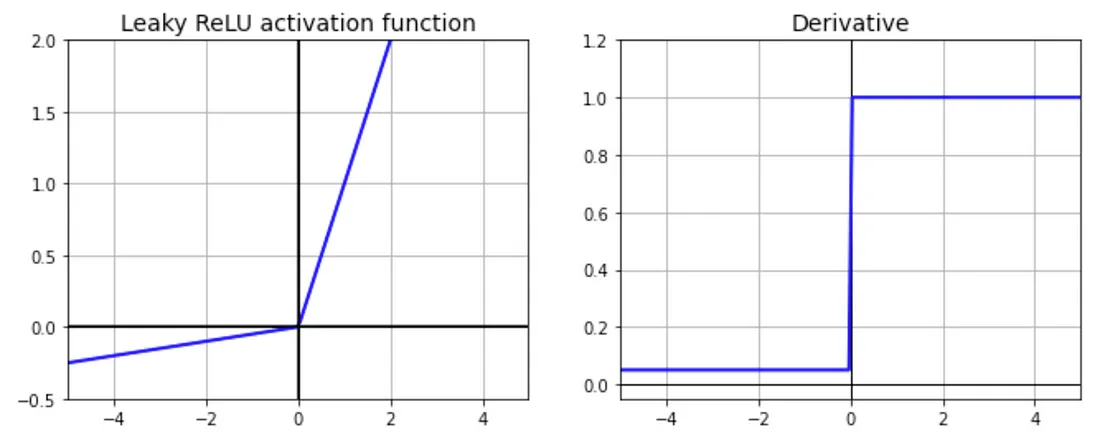

<br />

Some problems:

> **Hyperparameter α (*Alpha*)** - since the α hyperparameter must be set by the Data Scientist, it may take several tries untill finding the best match.

<br />

Code:

In [5]:
from tensorflow.keras.layers import LeakyReLU

leaky_relu = LeakyReLU(alpha=0.01)

model = keras.Sequential([
    layers.Dense(units=512, activation=leaky_relu, input_shape=[11])
])

----

<b>Parametric Leaky ReLU (*PReLU*)</b>

The `Parametric Leaky ReLU (PReLU)` is similar to `Leaky ReLU`, being the hyperparameter alpha the unique difference. While in Leaky ReLU the Data Scientist must set its value, in PReLU there's no need for that, because the network will adjust its value with the weights and bias.

With this in mind, you'll notice that the equation, function plot and deritivative plot will be the same as Leaky ReLU.

<br />

Some problems:

> **Longer Training Step** - since the hyperparameter is adjusted with the weights and bias, the training step will take more time!

<br />

Code:

In [6]:
from tensorflow.keras.layers import PReLU

prelu = PReLU()

model = keras.Sequential([
    layers.Dense(units=512, activation=prelu, input_shape=[11])
])

----

<b>- Exponential Linear Unit (*ELU*)</b>

The `Exponential Linear Unit (ELU)` is a variation of ReLU with a better output for `x <= 0`. Equation:

```python
elu(x) = alpha * (e**x -1) if x <= 0 else x
```

$$
elu(x) = \begin{cases}
\alpha \cdot (e^x - 1) & \text{if } x \leq 0 \\
x & \text{if } x > 0
\end{cases}
$$

<br />

Plot of the function and its derivative:

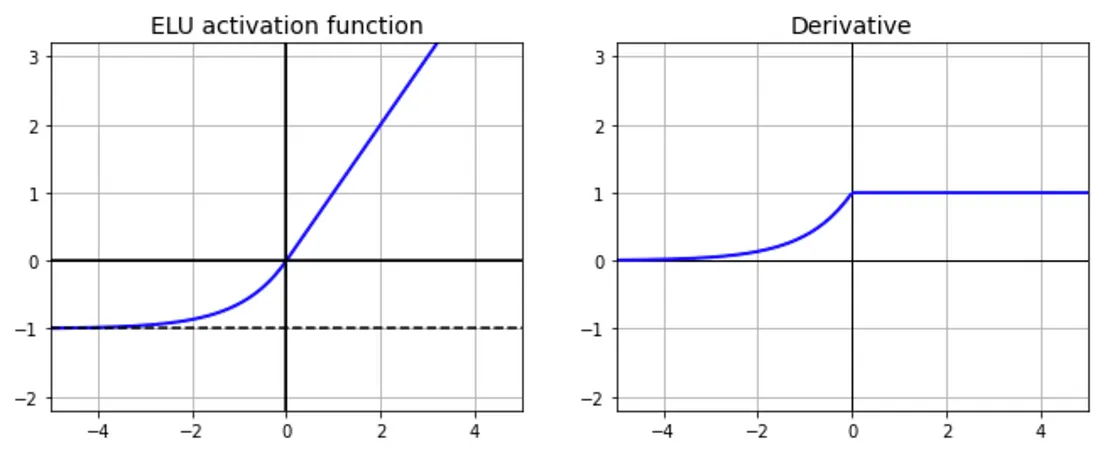

<br />

Problems:

> **Slower Computation** - `ELU` is **slower to comput** than `ReLU` and its variants `PReLU` and `Leaky ReLU` due to the use of the exponential function, but during training this is compensated by the **faster Convergence Rate**. However, at test time, an `ELU` network will be **slower** than a `ReLU` network.

<br />

Code:

In [7]:
model = keras.Sequential([
    layers.Dense(units=512, activation='elu', input_shape=[11])
])

----

<b>- Scaled Exponential Linear Unit (*SELU*)</b>

The `Exponential Linear Unit (SELU)` is another variation of ReLU that's used for the premise: "*if you build a neural network composed exclusively of a stack of Dense Layers and if all hidden layers use the `SELU` Activation Function, then the network will **self-normalize** (the output of each layer will tend to preserve mean 0 and standard deviation 1 during training, which resolves the vanishing/exploding gradient problem).*".

In a nutshell, if you use `SELU` as the Activation Function on the hidden Dense Layers of your model, you likely won't have the need to use **Batch Normalization Layers** because the outputs will be normalized by the layers.

Besides, `SELU` often performs better (*outperforms*) than other ReLU variants.

Equation:

```python
selu(x) = scale * x if x > 0 else scale * alpha * e**x - alpha
```

$$
selu(x) = \begin{cases}
\text{scale} \cdot x & \text{if } x > 0 \\
\text{scale} \cdot \alpha \cdot e^x - \alpha & \text{if } x \leq 0
\end{cases}
$$

<br />

Plot of the function and its derevative:

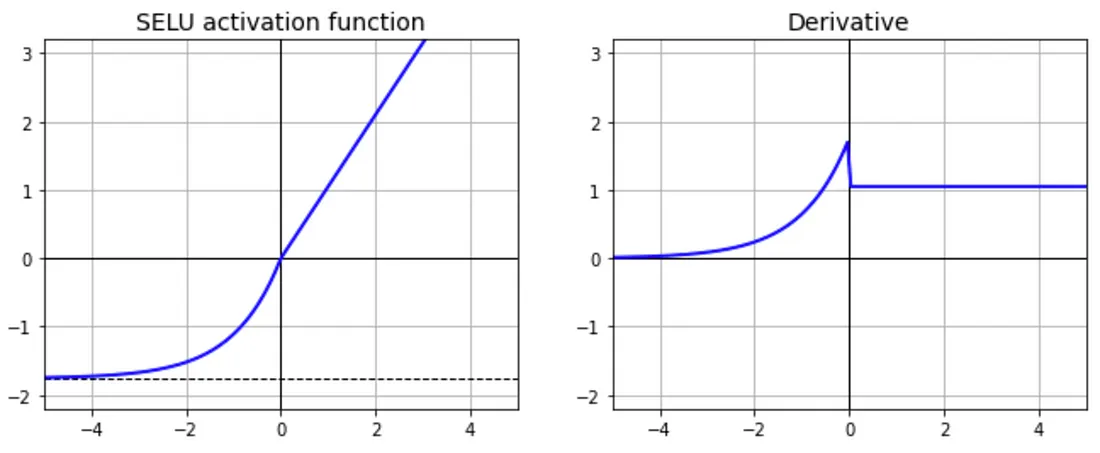

<br />

Some Problems:

> **Dense Layers Exclusivity** - `SELU` works only for a neural network composed exclusively of a **stack of Dense Layers**. It might not work for **Convolution Neural Networks**;

> **LeCun Normal Initialization** - every hidden layer's weights must also be initialized using `LeCun Normal Initialization`, demanding more machine's process power;

> **Input Features Standardization** - input features must be standardized with **mean 0** and **standard deviation 1**. For this, you can use `StandardScaler`.

<br />

Code:

In [8]:
model = keras.Sequential([
    layers.Dense(units=512, activation='relu', kernel_initializer='lecun_normal', input_shape=[11])
])

----

After reading about all these seven Activation Functions, you may be wondering: "*How the hell am I supposed to know which Activation Function to use in each case?*". Here's a cheatsheet from *Hands-on Machine Learning* book at page 332:

> In general choose SELU > ELU > Leaky ReLU (and its variants) > ReLU > Tanh > Sigmoid/Logistic;

> If the network’s architecture prevents it from self-normalizing, then ELU may perform better than SELU (*since SELU is not smooth at x = 0*);

> If you care a lot about runtime latency, then you may prefer Leaky ReLU;

> If you don’t want to tweak yet another hyperparameter, you may just use the default α values used by Keras (*e.g., 0.3 for the leaky ReLU*);

> If you have spare time and computing power, you can use cross-validation to evaluate other activation functions, in particular, RReLU if your network is over‐fitting, or PReLU if you have a huge training set.

Also, remember:

> Tahn and Logistic/Sigmoid Activation Functions are used for Binary Classification Problems;

> Use Sigmoid Function rather than Tahn when you want **stronger gradients** and **big learning steps**.